In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
df_main = pd.read_csv("../data/features/features_stats_master.csv")
df_main.head()

,stat,word_count,character_count,average_word_length,sentence_count,TTR,RTTR,CTTR,DMetric,Mass,...,bigram_repetition_ratio,trigram_repetition_ratio,hapax_legomena_ratio,present_participle_count,passive_voice_count,conjunction_count,pronoun_count,contraction_count,model,data
0,mean,81.119462,335.829995,4.098665,4.431050,0.787898,0.127568,4.410816,0.007521,0.030797,...,0.027324,0.007130,0.646971,2.293390,0.233949,2.597089,2.663922,0.426363,human,nyt-comments
1,std,66.091653,279.873303,0.506520,3.429274,0.117334,0.059820,1.193748,0.005743,0.014047,...,0.036388,0.020004,0.165800,2.588001,0.560714,2.870722,3.051235,0.905561,human,nyt-comments
2,min,3.000000,11.000000,1.000000,1.000000,0.074074,0.023860,0.384900,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,human,nyt-comments
3,max,450.000000,2594.000000,59.000000,84.000000,1.000000,0.577350,9.959292,1.000000,0.787954,...,0.924528,0.923077,1.000000,59.000000,14.000000,35.000000,56.000000,30.000000,human,nyt-comments
4,median,60.000000,247.000000,4.081633,3.000000,0.788462,0.114462,4.333333,0.007095,0.032267,...,0.016556,0.000000,0.629630,2.000000,0.000000,2.000000,2.000000,0.000000,human,nyt-comments


In [3]:
def get_csv_paths(folder_path, recursive=False):
    if recursive:
        # Walk through all subdirectories
        file_paths = [os.path.join(root, file) 
                      for root, _, files in os.walk(folder_path) 
                      for file in files if file.endswith('.csv')]
    else:
        # Get files in the root folder only
        file_paths = [os.path.join(folder_path, file) 
                      for file in os.listdir(folder_path) 
                      if file.endswith('.csv')]
    
    return file_paths

In [4]:
paths_ai = get_csv_paths("../data/features/data_ai/", recursive=True)
paths_human = get_csv_paths("../data/features/data_human/")
datas = df_main["data"].unique()
datas.sort()

In [5]:
def get_data(data, feature, paths_ai, paths_human):
    ai_features = []
    for path in paths_ai:
        if data in path:
            df = pd.read_csv(path)
            ai_features.extend(df[feature].tolist())
    
    for path in paths_human:
        if data in path:
            df = pd.read_csv(path)
            human_features = df[feature].tolist()
    return ai_features, human_features

In [6]:
datas_names = ["Blogs", "Essays", "Natural Questions", "NYT Articles", "NYT Comments", "RAID", "Reddit", "Tweets", "WritingPrompts", "XSum"]

In [7]:
feature = "sentiment"
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

100%|██████████| 10/10 [04:04<00:00, 24.49s/it]


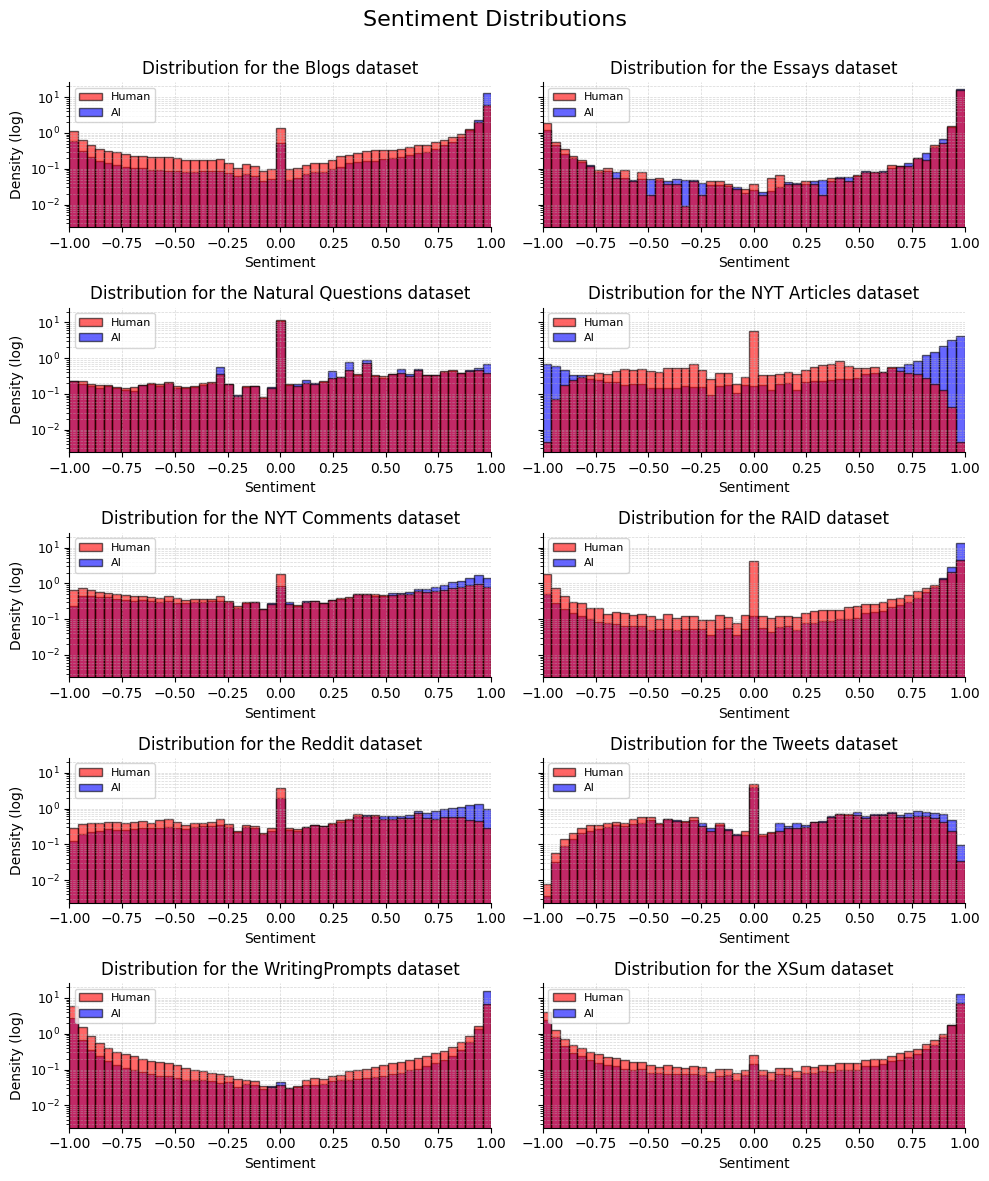

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 1
for i in range(10):
    ax = axes[i]
    
    ai_feat_clip = np.clip(ai_features[i], -1, lim)
    human_feat_clip = np.clip(human_features[i], -1, lim)

    combined_data = np.concatenate([human_feat_clip, ai_feat_clip])
    bins = np.linspace(combined_data.min(), combined_data.max(), 50)  # 50 bins = 51 edges

    ax.hist(ai_feat_clip, bins=bins, alpha=0.6, label='AI', color='blue', density=True, edgecolor='black', linewidth=1)
    ax.hist(human_feat_clip, bins=bins, alpha=0.6, label='Human', color='red', density=True, edgecolor='black', linewidth=1)
    
    ax.set_title(f"Distribution for the {datas_names[i]} dataset", fontsize=12)
    ax.set_xlabel("Sentiment", fontsize=10)
    ax.set_yscale("log")
    if i % 2 == 0:
        ax.set_ylabel("Density (log)", fontsize=10)
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(-1, lim)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left', fontsize=8)

fig.suptitle("Sentiment Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [ ]:
feature = "word_count"
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 3000
for i in range(10):
    ax = axes[i]
    
    ai_feat_clip = np.clip(ai_features[i], 0, lim)
    human_feat_clip = np.clip(human_features[i], 0, lim)

    combined_data = np.concatenate([human_feat_clip, ai_feat_clip])
    bins = np.linspace(combined_data.min(), combined_data.max(), 50)  # 50 bins = 51 edges

    ax.hist(ai_feat_clip, bins=bins, alpha=0.6, label='AI', color='blue', density=True, edgecolor='black', linewidth=1)
    ax.hist(human_feat_clip, bins=bins, alpha=0.6, label='Human', color='red', density=True, edgecolor='black', linewidth=1)
    
    ax.set_title(f"Distribution for the {datas_names[i]} dataset", fontsize=12)
    ax.set_xlabel("Word count", fontsize=10)
    ax.set_yscale("log")
    if i % 2 == 0:
        ax.set_ylabel("Density (log)", fontsize=10)
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0, lim)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=8)

fig.suptitle("Word Count Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [ ]:
feature = "average_sentence_length"
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 100
for i in range(10):
    ax = axes[i]
    
    ai_feat_clip = np.clip(ai_features[i], 0, lim)
    human_feat_clip = np.clip(human_features[i], 0, lim)

    combined_data = np.concatenate([human_feat_clip, ai_feat_clip])
    bins = np.linspace(combined_data.min(), combined_data.max(), 50)  # 50 bins = 51 edges

    ax.hist(ai_feat_clip, bins=bins, alpha=0.6, label='AI', color='blue', density=True, edgecolor='black', linewidth=1)
    ax.hist(human_feat_clip, bins=bins, alpha=0.6, label='Human', color='red', density=True, edgecolor='black', linewidth=1)
    
    ax.set_title(f"Distribution for the {datas_names[i]} dataset", fontsize=12)
    ax.set_xlabel("Average sentence length", fontsize=10)
    ax.set_yscale("log")
    ax.set_xlim(0, lim)
    if i % 2 == 0:
        ax.set_ylabel("Density (log)", fontsize=10)
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=8)

fig.suptitle("Average Sentence Length Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [ ]:
feature = "TTR"
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 1
for i in range(10):
    ax = axes[i]
    
    ai_feat_clip = np.clip(ai_features[i], 0, lim)
    human_feat_clip = np.clip(human_features[i], 0, lim)

    combined_data = np.concatenate([human_feat_clip, ai_feat_clip])
    bins = np.linspace(combined_data.min(), combined_data.max(), 50)  # 50 bins = 51 edges

    ax.hist(ai_feat_clip, bins=bins, alpha=0.6, label='AI', color='blue', density=True, edgecolor='black', linewidth=1)
    ax.hist(human_feat_clip, bins=bins, alpha=0.6, label='Human', color='red', density=True, edgecolor='black', linewidth=1)
    
    ax.set_title(f"Distribution for the {datas_names[i]} dataset", fontsize=12)
    ax.set_xlabel("Type-Token Ratio", fontsize=10)
    ax.set_yscale("log")
    ax.set_xlim(0, lim)
    if i % 2 == 0:
        ax.set_ylabel("Density (log)", fontsize=10)
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=8)

fig.suptitle("Type-Token Ratio Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [ ]:
def get_data(data, feature, paths_ai, paths_human):
    ai_features = []
    for path in paths_ai:
        if data in path:
            df = pd.read_csv(path)
            ai_features.extend(df[feature].to_numpy())
    
    for path in paths_human:
        if data in path:
            df = pd.read_csv(path)
            human_features = df[feature].to_numpy()
    return ai_features, human_features

In [ ]:
feature = ["word_count", "TTR"]
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]

In [ ]:
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

In [ ]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 3000
for i in range(10):
    ax = axes[i]
    # ai_feat_clip = np.clip(ai_features[i], 0, lim)
    # human_feat_clip = np.clip(human_features[i], 0, lim)

    ax.scatter(np.vstack(ai_features[i])[:,0], np.vstack(ai_features[i])[:,1], alpha=0.3, label='AI', color='dodgerblue', edgecolor='black', linewidth=0, s=3)
    ax.scatter(np.vstack(human_features[i])[:,0], np.vstack(human_features[i])[:,1], alpha=0.3, label='Human', color='crimson', edgecolor='black', linewidth=0, s=3)
    
    ax.set_title(f"Scatter plot for the {datas_names[i]} dataset", fontsize=12)
    ax.set_ylabel("Type-Token Ratio", fontsize=10)
    ax.set_xlabel("Word Count", fontsize=10)
    # ax.set_yscale("log")
    ax.set_xlim(0, lim)
    if i % 2 == 0:
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', label='Human',
            markerfacecolor='crimson', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='AI',
            markerfacecolor='dodgerblue', markersize=8)
    ]

    ax.legend(legend_handles, ['Human', "AI"], loc='upper right', fontsize=8)

fig.suptitle("Word Count vs Type-Token Ratio Scatter Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [ ]:
feature = ["dependency_distance", "discourse_marker_ratio", "verb_ratio", "flesch_reading_ease"]

In [ ]:
for ds in tqdm(datas):
    ai_data, human_data = get_data(ds, feature, paths_ai, paths_human)
    
    # Convert numpy arrays to DataFrame and then to dict
    ai_data_dict = pd.DataFrame(ai_data, columns=feature).to_dict(orient="records")
    human_data_dict = pd.DataFrame(human_data, columns=feature).to_dict(orient="records")
    
    # Prepare records with source and dataset info
    all_records = []
    all_records.extend([{**row, "source": "AI", "dataset": ds} for row in ai_data_dict])
    all_records.extend([{**row, "source": "Human", "dataset": ds} for row in human_data_dict])
    
    # Create DataFrame
    df_all = pd.DataFrame(all_records)
    
    # Save to CSV (append if the file exists, create new if not)
    df_all.to_csv("all_features.csv", mode='a', header=not pd.io.common.file_exists("all_features.csv"), index=False)

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("all_features.csv")
data.drop(columns=["dataset"], inplace=True)

In [ ]:
data_sample1 = data[data["source"] == "Human"].sample(50_000)
data_sample2 = data[data["source"] == "AI"].sample(50_000)
data_sample = pd.concat([data_sample1, data_sample2])

In [ ]:
data_sample["Mass"] = data_sample["Mass"].clip(0, 0.2)
data_sample["syntactic_depth"] = data_sample["syntactic_depth"].clip(0, 20)
data_sample["conjunction_count"] = data_sample["conjunction_count"].clip(0, 40)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot and return the PairGrid object
g = sns.pairplot(data_sample, hue='source', palette={'Human': 'crimson', 'AI': 'dodgerblue'}, plot_kws={'alpha': 0.3})

plt.rcParams.update({
    'font.size': 12,             # Overall font size
    'axes.labelsize': 14,       # Font size for x and y axis labels
    'xtick.labelsize': 10,      # Font size for x-axis tick labels
    'ytick.labelsize': 10,      # Font size for y-axis tick labels
    'legend.fontsize': 12,      # Font size for legend text (will be overridden below for clarity)
    'figure.titlesize': 16      # Font size for suptitle
})

# Map string labels to numeric for classifier
y = data_sample['source'].map({'Human': 0, 'AI': 1})

# Get list of feature names (excluding the label column)
features = [col for col in data_sample.columns if col != 'source']

# Set a title for the plot
plt.suptitle("Pairplot: AI vs Human Textual Features", y=1.02, fontsize=16)

legend = g.legend

# Iterate through the legend handles and set their alpha to 1
for handle in legend.legend_handles:
    handle.set_alpha(1)
# Show the plot
plt.show()

In [5]:
paths_ai = get_csv_paths("../data/features/data_ai/", recursive=True)

In [6]:
for path in tqdm(paths_ai):
    path_t = path.replace("features/", "").replace("_features", "")
    df = pd.read_csv(path)
    df_t = pd.read_csv(path_t)
    if len(df) != len(df_t):
        print(path)
        print(len(df), len(df_t))
        print("===")
        continue

    df["temp"] = df_t["temperature"]
    df.to_csv(path, index=False)

 34%|███▍      | 71/210 [04:26<19:45,  8.53s/it]

../data/features/data_ai/tweets/tweets_Qwen2-72B-Instruct-AWQ_features.csv
8212 155966
===


100%|██████████| 210/210 [32:10<00:00,  9.19s/it]


In [22]:
path = "../data/features/data_ai/tweets/tweets_Qwen2.5-72B-Instruct-AWQ_features.csv"
path_t = path.replace("features/", "").replace("_features", "")

In [23]:
df = pd.read_csv(path)
len(df)

155966

In [24]:
df_t = pd.read_csv(path_t)
len(df_t)

155966

In [25]:
df["temp"] = df_t["temperature"]
df.to_csv(path, index=False)

In [26]:
def get_data(data, feature, paths_ai):
    ai_features = []
    for path in paths_ai:
        if data in path:
            df = pd.read_csv(path)
            ai_features.extend(df[feature].to_numpy())
    
    return ai_features

In [35]:
features = ["TTR", "bigram_repetition_ratio", "entropy_score", "syntactic_depth", "temp"]

In [30]:
for ds in tqdm(datas):
    try:
        ai_data = get_data(ds, feature, paths_ai)
        
        # Convert numpy arrays to DataFrame and then to dict
        ai_data_dict = pd.DataFrame(ai_data, columns=feature).to_dict(orient="records")
        
        # Prepare records with source and dataset info
        all_records = []
        all_records.extend([row for row in ai_data_dict])
        
        # Create DataFrame
        df_all = pd.DataFrame(all_records)
        
        # Save to CSV (append if the file exists, create new if not)
        df_all.to_csv("all_features2.csv", mode='a', header=not pd.io.common.file_exists("all_features2.csv"), index=False)
    except:
        pass

100%|██████████| 10/10 [05:51<00:00, 35.13s/it]


In [49]:
df = pd.read_csv("all_features2.csv")

In [50]:
df["syntactic_depth"] = df["syntactic_depth"].clip(0, 20)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors

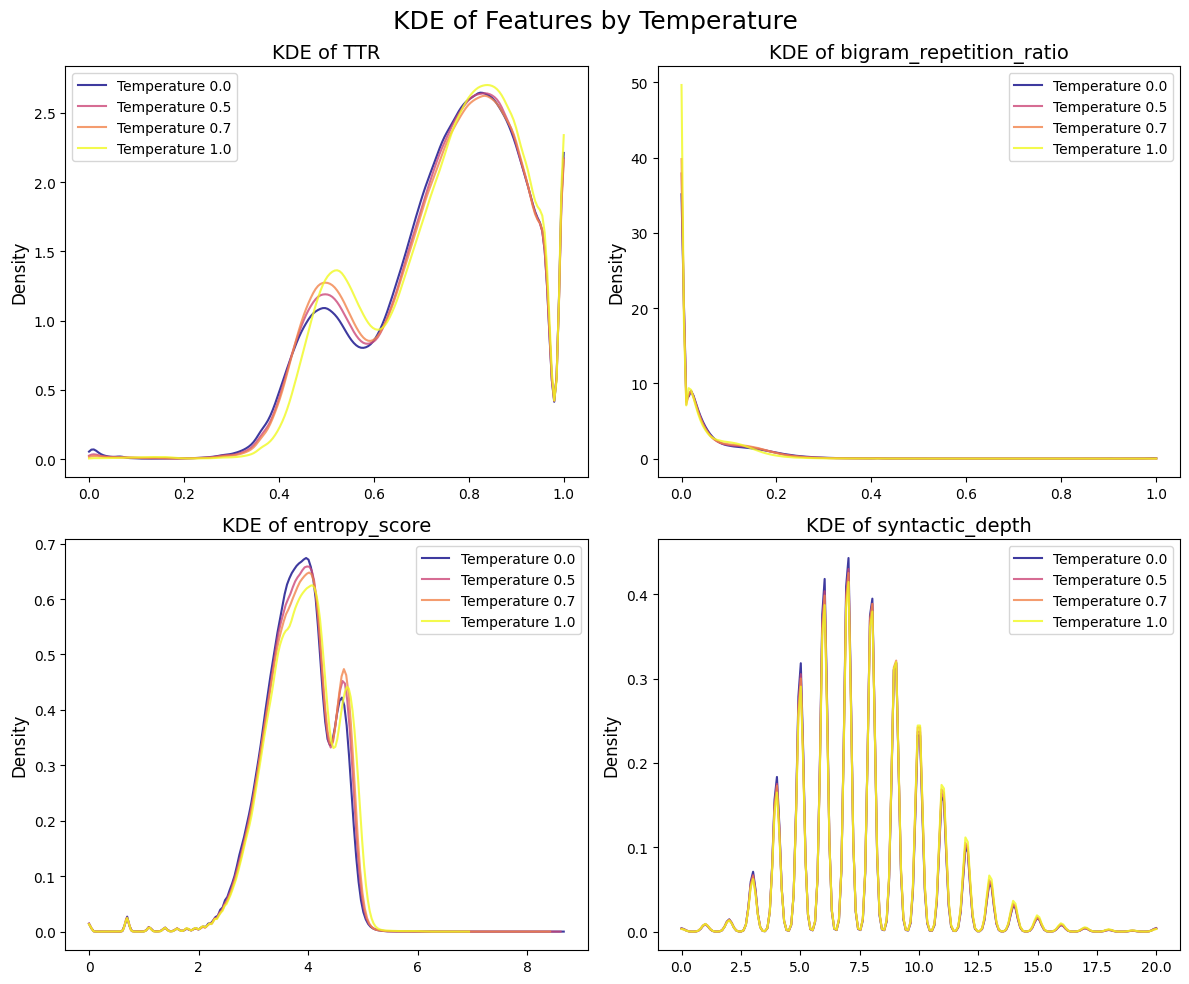

In [53]:
temperature_levels = sorted(df['temp'].unique())

norm = mcolors.Normalize(vmin=min(temperature_levels), vmax=max(temperature_levels))
cmap = plt.get_cmap('plasma')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features[:-1]):
    ax = axes[i]
    for temp in temperature_levels:
        data = df[df['temp'] == temp][feature].dropna()
        if len(data) > 1:  # KDE requires more than 1 data point
            kde = gaussian_kde(data)
            x_vals = np.linspace(data.min(), data.max(), 200)
            y_vals = kde(x_vals)
            color = cmap(norm(temp))
            ax.plot(x_vals, y_vals, label=f'Temperature {temp}', color=color, alpha=0.8)
    ax.set_title(f'KDE of {feature}' , fontsize=14)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend()

plt.suptitle("KDE of Features by Temperature", fontsize=18)
plt.tight_layout()
plt.show()